In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data
df=pd.read_csv('/content/covid_19_clean_complete.csv')
df.head()
# Confirmed is the cases  confirmed on the current date but the Active is the combination of Cases across dates(may be active cases from past 14days etc)
# Active=Confirmed-Death-Recovered

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [4]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [5]:
# Total How many countries..We have total of 187 countries
# we can also write like df['Country/Region'].nunique()
df['Country/Region'].unique().size

187

In [6]:
#df['Country/Region'].nunique()

In [7]:
# Total How many countries
df.groupby('Country/Region').count()

,Province/State,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
Country/Region,,,,,,,,,
Afghanistan,0,188,188,188,188,188,188,188,188
Albania,0,188,188,188,188,188,188,188,188
Algeria,0,188,188,188,188,188,188,188,188
Andorra,0,188,188,188,188,188,188,188,188
Angola,0,188,188,188,188,188,188,188,188
...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,188,188,188,188,188,188,188,188
Western Sahara,0,188,188,188,188,188,188,188,188
Yemen,0,188,188,188,188,188,188,188,188


In [9]:
# As we have around 49068 rows,how many rows for the dates? For each date we have 261 rows.
df['Date'].value_counts()

,count
Date,
2020-01-22,261
2020-05-30,261
2020-05-21,261
2020-05-22,261
2020-05-23,261
...,...
2020-03-26,261
2020-03-27,261
2020-03-28,261


In [10]:
# We could see that we have same date repeted for the countries
df[df['Date']=='2020-01-22']['Country/Region'].value_counts().reset_index()

,Country/Region,count
0,China,33
1,Canada,12
2,France,11
3,United Kingdom,11
4,Australia,8
...,...,...
182,Holy See,1
183,Honduras,1
184,Hungary,1
185,Iceland,1


In [11]:
# Lets consider the china and filter it with the date and check the data
# As we have the multiple Province/State in a country, we could see that there are many records for each country for the single date.
df[(df['Date']=='2020-01-22') & (df['Country/Region']=='China')]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific
53,Guangdong,China,23.3417,113.4244,2020-01-22,26,0,0,26,Western Pacific
54,Guangxi,China,23.8298,108.7881,2020-01-22,2,0,0,2,Western Pacific
55,Guizhou,China,26.8154,106.8748,2020-01-22,1,0,0,1,Western Pacific
56,Hainan,China,19.1959,109.7453,2020-01-22,4,0,0,4,Western Pacific
57,Hebei,China,39.5490,116.1306,2020-01-22,1,0,0,1,Western Pacific


In [12]:
# On one random single day how many active cases
df.groupby('Date')['Active'].sum('Active').reset_index()

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [13]:
#To get it on a single date 2020-01-22
df[df['Date']=='2020-01-22']['Active'].sum()

510

In [14]:
# Top 10 countries with most recovered cases for all dates
df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()

,Country/Region,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


In [15]:
# What is the desc order of most cases
df.groupby('Date')['Active'].sum('Active').reset_index()

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


In [16]:
# Total How many cases whether Active or confirmaed etc on that particular date
df.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum()

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,555,17,28,510
2020-01-23,654,18,30,606
2020-01-24,941,26,36,879
2020-01-25,1434,42,39,1353
2020-01-26,2118,56,52,2010
...,...,...,...,...
2020-07-23,15510481,633506,8710969,6166006
2020-07-24,15791645,639650,8939705,6212290
2020-07-25,16047190,644517,9158743,6243930


In [17]:
Confirmeddf=df.groupby('Date')['Confirmed'].sum().reset_index()
Confirmeddf

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


<Axes: xlabel='Date', ylabel='Confirmed'>

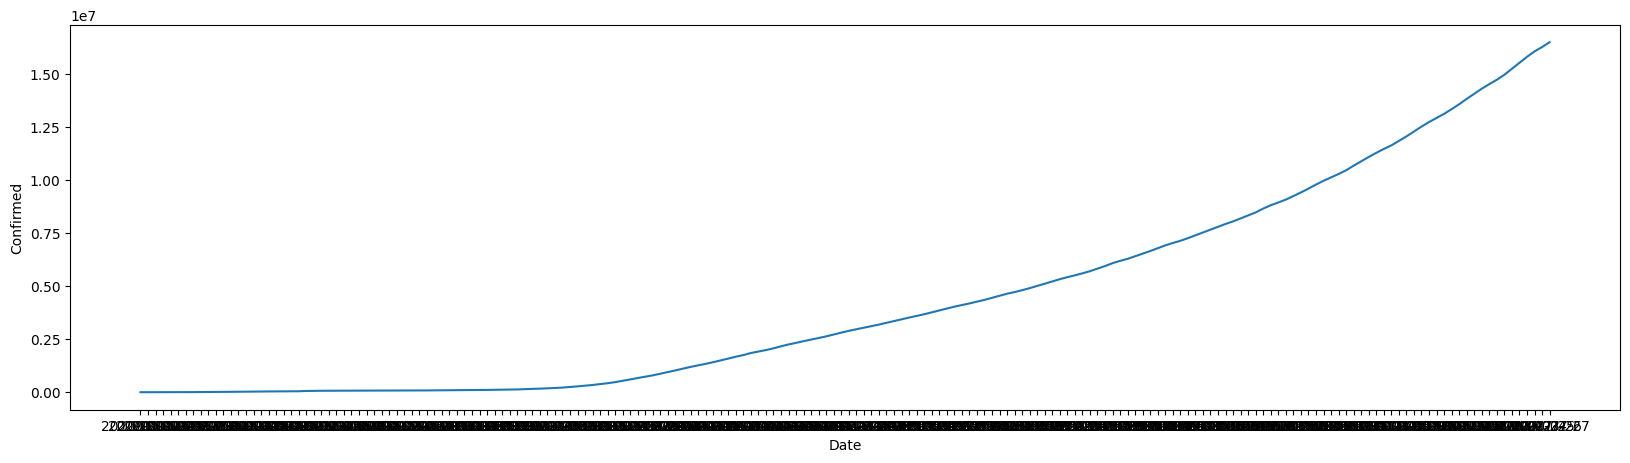

In [18]:
plt.figure(figsize=(20,5),dpi=100)
sns.lineplot(Confirmeddf, x=Confirmeddf['Date'],y=Confirmeddf['Confirmed'])

In [20]:
# tOP 10 COUNTRIES with most recovered cases
Recoveredtop10df=df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()

In [21]:
Recoveredtop10df

,Country/Region,Recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


<Axes: xlabel='Country/Region', ylabel='Recovered'>

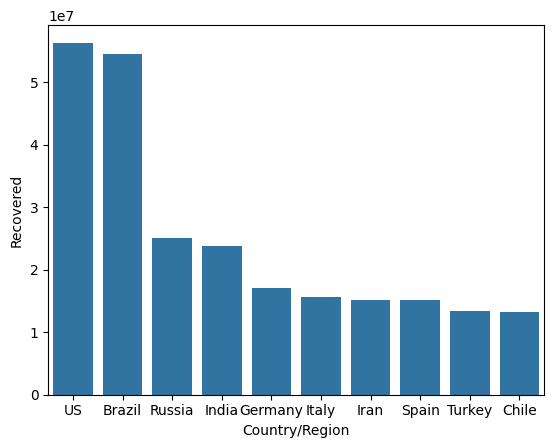

In [22]:
sns.barplot(data=Recoveredtop10df,x=Recoveredtop10df['Country/Region'],y=Recoveredtop10df['Recovered'])

In [24]:
# Top 10 countries with most Deaths
DeathsTop10=df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10).reset_index()
DeathsTop10

,Country/Region,Deaths
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


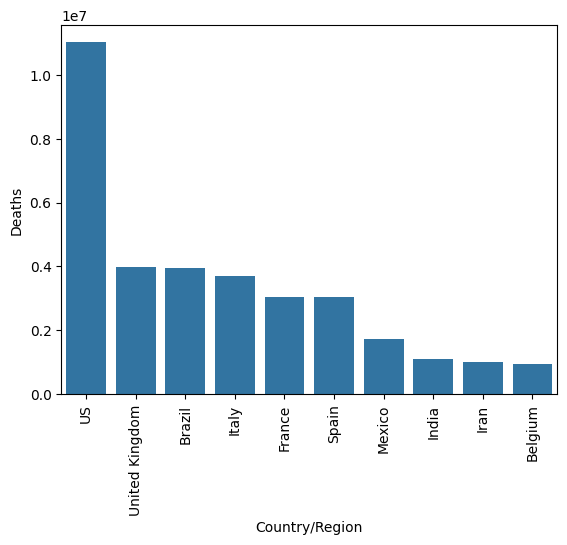

In [25]:
sns.barplot(data=DeathsTop10,x=DeathsTop10['Country/Region'],y=DeathsTop10['Deaths'])
plt.xticks(rotation=90)
plt.show()

In [26]:
# Top 10 countries with most active cases
ActiveTop10=df.groupby('Country/Region')['Active'].sum().sort_values(ascending=False).head(10).reset_index()
ActiveTop10

,Country/Region,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


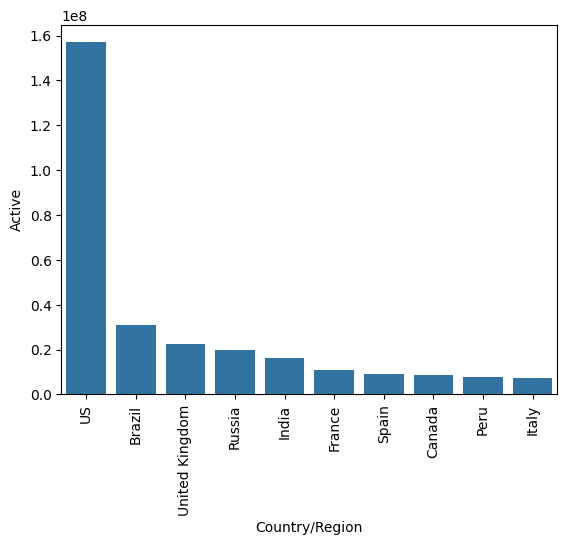

In [27]:
sns.barplot(data=ActiveTop10,x=ActiveTop10['Country/Region'],y=ActiveTop10['Active'])
plt.xticks(rotation=90)
plt.show()

In [28]:
# Inference: US has more Deaths, Active and Recovered Cases when compared to other countries

In [29]:
# For Analysis, lets consider US, BRAZIL and UK as they are top3. So lets create 3 data frames for each 3

In [30]:
US=df[df['Country/Region']=='US']
Brazil=df[df['Country/Region']=='Brazil']
India=df[df['Country/Region']=='India']

In [31]:
India

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [32]:
US=US.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum()
Brazil=Brazil.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum()
India=India.groupby('Date')[['Confirmed','Deaths','Recovered','Active']].sum()

In [34]:
India

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
...,...,...,...,...
2020-07-23,1288108,30601,817209,440298
2020-07-24,1337024,31358,849432,456234
2020-07-25,1385635,32060,885573,468002


In [35]:
# Create figure for Active cases
import plotly.graph_objects as go
fig_active = go.Figure()

# Add traces for Active cases
fig_active.add_trace(go.Scatter(
    x=US.index,
    y=US['Active'],
    mode='lines+markers',
    name='US Active',
    marker=dict(color='darkred')
))

fig_active.add_trace(go.Scatter(
    x=Brazil.index,
    y=Brazil['Active'],
    mode='lines+markers',
    name='Brazil Active',
    marker=dict(color='darkblue')
))

fig_active.add_trace(go.Scatter(
    x=India.index,
    y=India['Active'],
    mode='lines+markers',
    name='India Active',
    marker=dict(color='darkgreen')
))

# Update layout for Active cases
fig_active.update_layout(
    title='COVID-19 Active Cases',
    xaxis_title='Date',
    yaxis_title='Number of Active Cases',
    width=1200,
    height=600,
    legend_title='Legend',
    legend=dict(
        x=0.1,
        y=1.1,
        orientation='h'
    )
)

# Show the Active cases figure
fig_active.show()


In [36]:
# Create a figure for Recovered Cases
fig = go.Figure()

# Add traces for each country
fig.add_trace(go.Scatter(
    x=US.index,
    y=US['Recovered'],
    mode='lines+markers',
    name='US',  # This will show in the legend
    marker=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=Brazil.index,
    y=Brazil['Recovered'],
    mode='lines+markers',
    name='Brazil',  # This will show in the legend
    marker=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=India.index,
    y=India['Recovered'],
    mode='lines+markers',
    name='India',  # This will show in the legend
    marker=dict(color='green')
))

# Update layout to include legends and customize
fig.update_layout(
    title='COVID-19 Recovered Cases',
    xaxis_title='Date',
    yaxis_title='Number of Recovered Cases',
    width=1200,
    height=600,
    legend_title='Countries',
    legend=dict(
        x=0.1,  # X position of the legend
        y=1.1,  # Y position of the legend
        orientation='h'  # Horizontal orientation
    )
)

# Show the figure
fig.show()

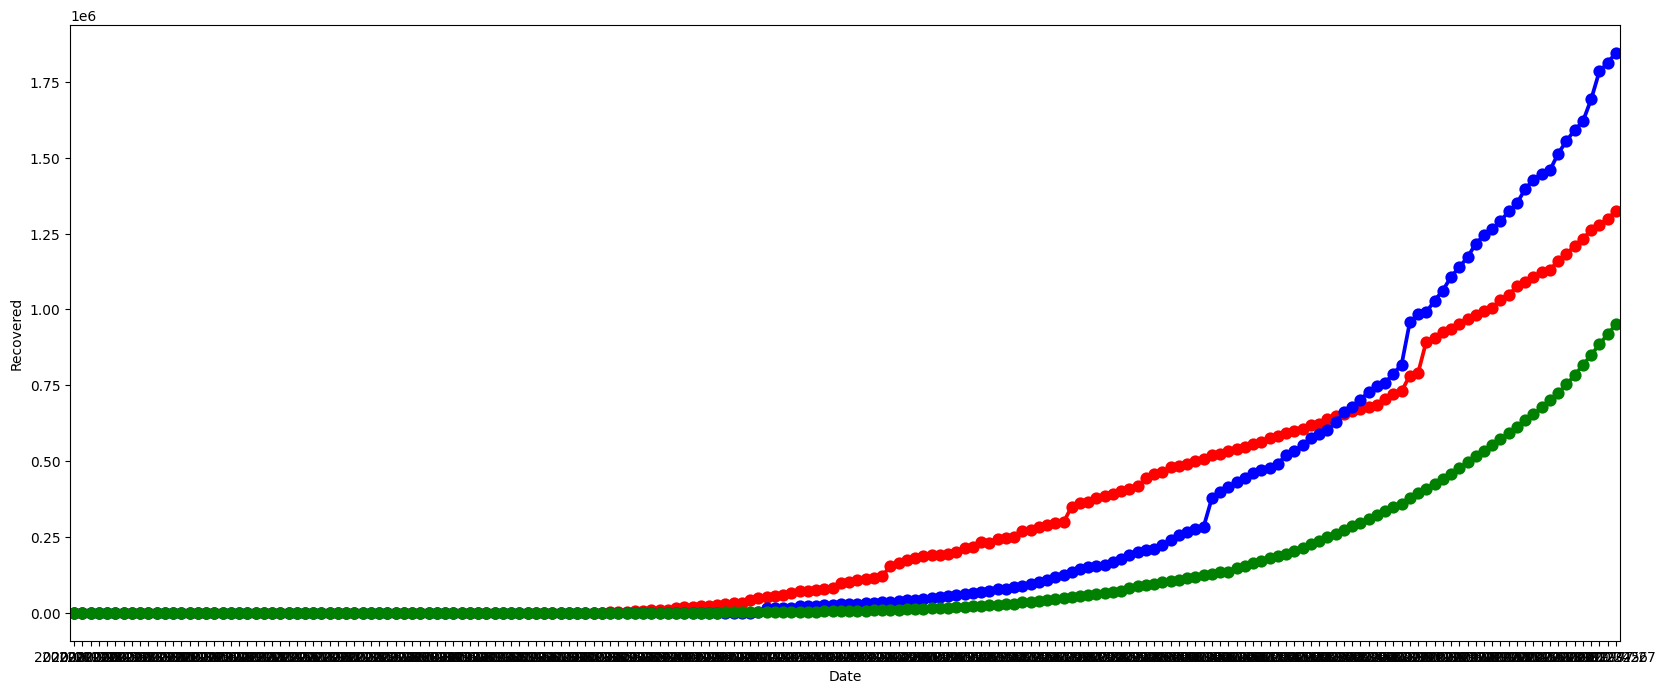

In [37]:
# Same Plot by using Seaborn
plt.figure(figsize=(20,8))
sns.pointplot(x=US.index,y=US.Recovered,color='Red')
sns.pointplot(x=Brazil.index,y=Brazil.Recovered,color='Blue')
sns.pointplot(x=India.index,y=India.Recovered,color='Green')
plt.show()

# We could say that the Brazil has Highest Recovered rate over a period of time in between them

In [38]:
# Model Building...........> Facebook prophit
# This Model is developed by the Facebook in the Year 2017.
## Note: This Model takes only 2 columns, one is the Date column in Date time data type and rename to ds
#and another is the Column that to be pridected needs to rename to y

In [39]:
# Our Aim is to predict the confirmed cases.

In [ ]:
# Step 1: To convert the date column to date time formate..for the df which we already created and make the data frame for the confirmed cases only

In [41]:
Confirmeddf['Date']=pd.to_datetime(Confirmeddf['Date'])
Confirmeddf

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [42]:
Confirmeddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       188 non-null    datetime64[ns]
 1   Confirmed  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [43]:
Confirmeddf.columns=['ds','y']

In [44]:
Confirmeddf

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [45]:
!pip install prophet

In [46]:
from prophet import Prophet

In [47]:
model=Prophet()

In [48]:
# Fitting in the model
model.fit(Confirmeddf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbonhd62/cf39mkqa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprbonhd62/44fxj1bh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32931', 'data', 'file=/tmp/tmprbonhd62/cf39mkqa.json', 'init=/tmp/tmprbonhd62/44fxj1bh.json', 'output', 'file=/tmp/tmprbonhd62/prophet_modelqid4hg6p/prophet_model-20241130051334.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:13:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:13:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [49]:
# This model will be predicted
y(t)=g(t)+s(t)+h(t)+e(t)
y(t)=Prediction value
g(t)=trends
s(t)=seasonality
h(t)=Holiday effects
e(t)=error term..>addictive term

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (<ipython-input-49-6e40a3445a02>, line 2)

In [50]:
# Once we fitted in the model, with the help of the model,to predict the future..we need to have a data frame to store the data. for that we need
# to use the make_future_dataframe() method and store in the data frame

In [51]:
# If we include include_history as True, then the all the values in the source data frame along with the predicted will be present
future=model.make_future_dataframe(periods=7,freq='D',include_history=False)
futurehist=model.make_future_dataframe(periods=7,freq='D',include_history=True)

In [52]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      7 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 184.0 bytes


In [54]:
# This future will actually creates a data frame a column called ds with the dates that needs to be predicted based on the
# above conditions.
future

,ds
0,2020-07-28
1,2020-07-29
2,2020-07-30
3,2020-07-31
4,2020-08-01
5,2020-08-02
6,2020-08-03


In [55]:
futurehist

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [56]:
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-28,1.633705e+07,1.621809e+07,1.642989e+07,1.633705e+07,1.633705e+07,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,0.0,0.0,0.0,1.632020e+07
1,2020-07-29,1.654104e+07,1.642546e+07,1.663567e+07,1.654023e+07,1.654138e+07,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,1.652997e+07
2,2020-07-30,1.674503e+07,1.663443e+07,1.686255e+07,1.674124e+07,1.675008e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
3,2020-07-31,1.694902e+07,1.685534e+07,1.706646e+07,1.694080e+07,1.695971e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
4,2020-08-01,1.715301e+07,1.705933e+07,1.727689e+07,1.713687e+07,1.717216e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
5,2020-08-02,1.735700e+07,1.725621e+07,1.747282e+07,1.732969e+07,1.738543e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07
6,2020-08-03,1.756099e+07,1.744061e+07,1.768091e+07,1.752319e+07,1.760016e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,1.755889e+07


In [57]:
# So we could see that all the records (including the 7 new records)
forecasthist=model.predict(futurehist)
forecasthist

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.247347e+05,8.167859e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.157180e+05,1.034703e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.981640e+04,1.062255e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.165535e+04,1.168286e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.259170e+04,1.131290e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663903e+07,1.685211e+07,1.674011e+07,1.675072e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685602e+07,1.706299e+07,1.693934e+07,1.695994e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.706480e+07,1.727434e+07,1.713661e+07,1.717296e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.724882e+07,1.747838e+07,1.733147e+07,1.738638e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [58]:
forecasthist

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.247347e+05,8.167859e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.157180e+05,1.034703e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.981640e+04,1.062255e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.165535e+04,1.168286e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.259170e+04,1.131290e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663903e+07,1.685211e+07,1.674011e+07,1.675072e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685602e+07,1.706299e+07,1.693934e+07,1.695994e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.706480e+07,1.727434e+07,1.713661e+07,1.717296e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.724882e+07,1.747838e+07,1.733147e+07,1.738638e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [59]:
# yhat------> Predicted
# yhat_lower	yhat_upper	------> Uncertinity range of the predicted value.
# trend	---> g(t)
# Seasonality------>s(t)...yearly
# Holiday term...>h(t)....> weekly
# additive_term.....>e(t)

In [60]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-07-28,1.632020e+07,1.621809e+07,1.642989e+07
1,2020-07-29,1.652997e+07,1.642546e+07,1.663567e+07
2,2020-07-30,1.674391e+07,1.663443e+07,1.686255e+07
3,2020-07-31,1.695910e+07,1.685534e+07,1.706646e+07
4,2020-08-01,1.716676e+07,1.705933e+07,1.727689e+07
5,2020-08-02,1.736430e+07,1.725621e+07,1.747282e+07
6,2020-08-03,1.755889e+07,1.744061e+07,1.768091e+07


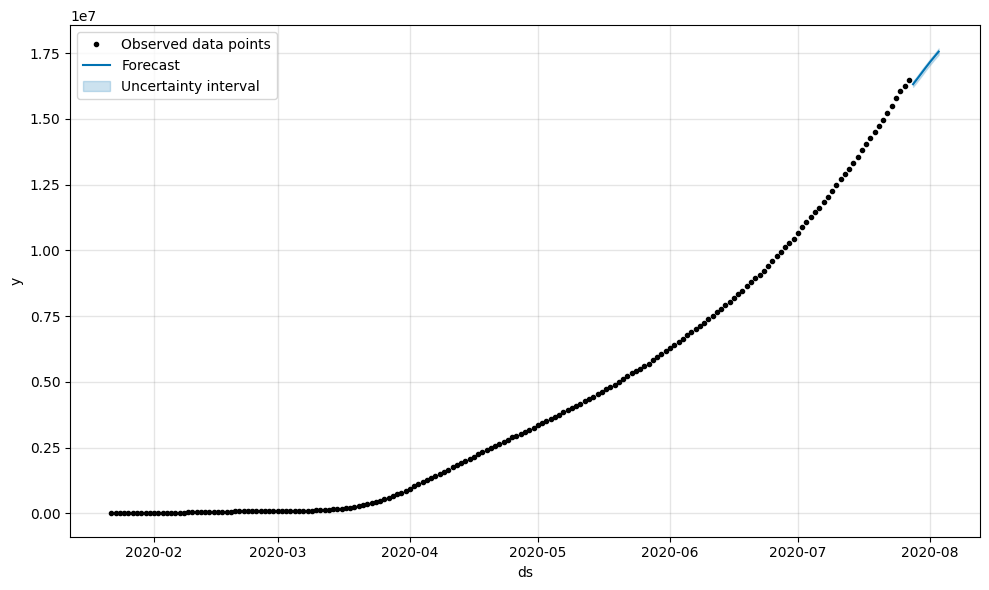

In [61]:
model.plot(forecast,include_legend=True)
plt.show()

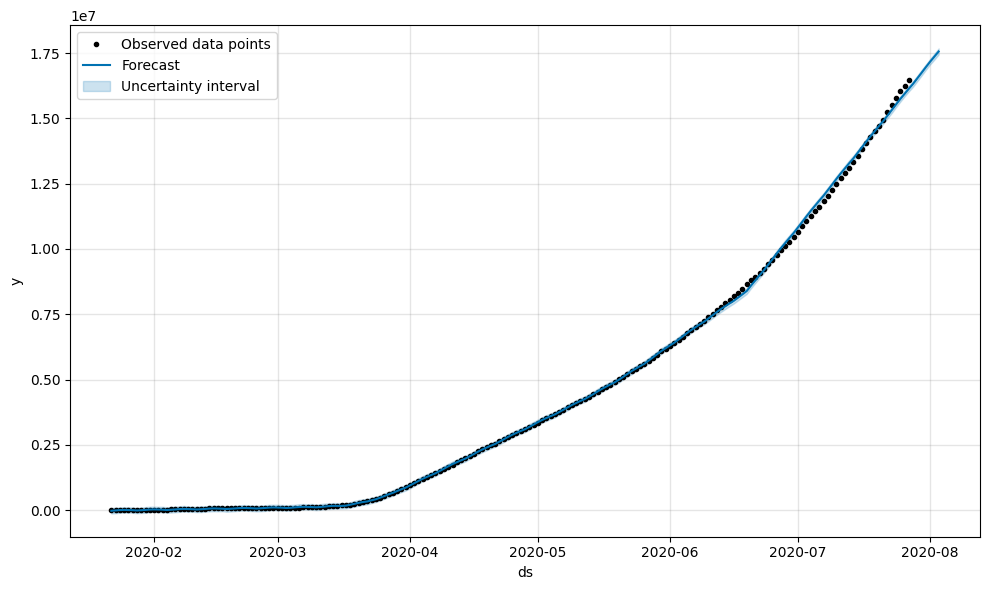

In [62]:
model.plot(forecasthist,include_legend=True)
plt.show()